# Exercising

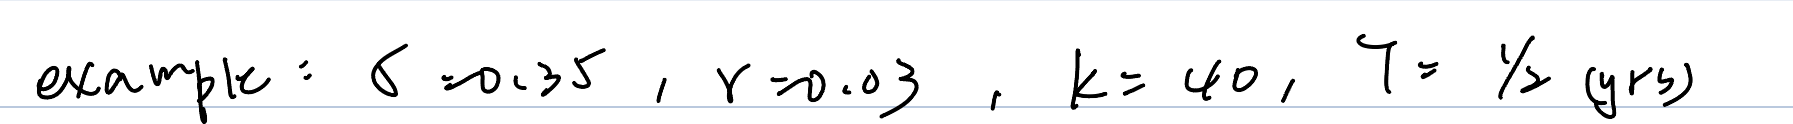

In [16]:
#Calculate the index we need
import scipy
from scipy.stats import norm
import math
from math import sqrt, exp, log

σ = 0.35
r = 0.03
K = 40
T = 0.5
S0 = 38
S = 40

def c0(σ, r, K, T, S0):
    d1 = (log(S0/K) + (r + 0.5*σ**2)*T) / (σ*sqrt(T))
    d2 = d1 - σ* sqrt(T)
    return norm.cdf(d1) * S0 - exp(-1*r*T) * K  * norm.cdf(d2)

def Δ(σ, r, K, T, S0):
    d1 = (log(S0/K) + (r + 0.5*σ**2)*T) / (σ*sqrt(T))
    return norm.cdf(d1)

def Γ(σ, r, K, T, S0):
    d1 = (log(S0/K) + (r + 0.5*σ**2)*T) / (σ*sqrt(T))
    return norm.pdf(d1) / (S0*σ*sqrt(T))

print("Initial Call Price with S0 = 38             = ", c0(σ, r, K, T, S0))
print("Initial Call Price with S = 40              = ", c0(σ, r, K, T, S))
print("Call price change due to stock price change = ", c0(σ, r, K, T, S)- c0(σ, r, K, T, S0))
print("Δ (= the share to purchase to replicate)    = ", Δ(σ, r, K, T, S0))
print("Γ (= the convexity of the stock)            = ", Γ(σ, r, K, T, S0))


Initial Call Price with S0 = 38             =  3.149922762134125
Initial Call Price with S = 40              =  4.214850936145719
Call price change due to stock price change =  1.0649281740115946
Δ (= the share to purchase to replicate)    =  0.49086367691478416
Γ (= the convexity of the stock)            =  0.04240914481989802


In [18]:
#Taylor expansion: predict the change if the price goes to S = 40. 
S = 40

def taylor_get_prediction(σ, r, K, T, S0, S):
    return Δ(σ, r, K, T, S0)*(S - S0) + 0.5 * Γ(σ, r, K, T, S0)*(S-S0)**2
print("The prediction of Call price change due to the stock price change via taylor expansion = "
      , taylor_get_prediction(σ, r, K, T, S0, S))

The prediction of Call price change due to the stock price change via taylor expansion =  1.0665456434693643


# Question 1

$Question$ $1:$ The continuously-compounded interest rate is $r = 0.02$, and a non-dividend paying stock has a current price of $ \$55 $ and a rate of return $volatility$ of $s = 0.40$. What is the $Black-Scholes-Merton$ value of a $European$ $put$ $option$ written on this stock if the option has a time until $maturity$ of $3/4$ year and an exercise price of $ \$50 $?

State your answer in dollars to the $nearest$ $cent$, e.g. $3.67$.

In [21]:
S0 * 55
r = 0.02
σ = 0.4
T = 0.75
k = 50

def p0(σ, r, K, T, S0):
    d1 = (log(S0/K) + (r + 0.5*σ**2)*T) / (σ*sqrt(T))
    d2 = d1 - σ* sqrt(T)
    return -1 * norm.cdf(-1*d1) * S0 + exp(-1*r*T) * K  * norm.cdf(-1*d2)
print("Initial Put Price = ", c0(σ, r, K, T, S0))

Initial Put Price =  4.648584481751822


# Question 2

$Question$ $2:$ An option dealer has a portfolio of different options written on the same stock. The portfolio is currently worth $\$10$ million and has a delta equal to $∆ = −0.2$ million a gamma equal to $Γ = 0.06$ million. It the stock price currently equals $\$30$, what will be the portfolio's value if the stock declines to $\$28$?

State your answer in millions of dollars to the second decimal place, e.g. 8.74 . 

In [22]:
V0 = 10
Δ = -0.2
Γ = 0.06
S0 = 30
S = 28

def taylor_get_portfolio_value(Δ, Γ, S, S0, V0):
    Vs = V0 + Δ * (S - S0) + 0.5 * Γ * (S - S0)**2
    return Vs
print(taylor_get_portfolio_value(Δ, Γ, S, S0, V0))

10.52


# Question 3

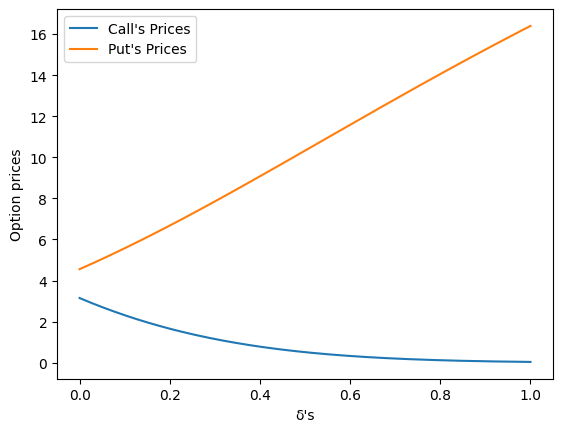

In [35]:
# import numpy as np
from numpy import sqrt, exp, log
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm 

σ = 0.35
r = 0.03
K = 40
T = 0.5
S0 = 38

def call_price_BSM(σ, r, K, T, S0, δ):
    d1 = (log(S0/K) + (r + 0.5*σ**2 - δ)*T) / (σ*sqrt(T))
    d2 = d1 - σ* sqrt(T)
    return norm.cdf(d1) * S0 * exp(-1*δ*T) - exp(-1*r*T) * K  * norm.cdf(d2)

def put_price_BSM(σ, r, K, T, S0, δ):
    d1 = (log(S0/K) + (r + 0.5*σ**2 - δ)*T) / (σ*sqrt(T))
    d2 = d1 - σ* sqrt(T)
    return -norm.cdf(-d1) * S0 * exp(-1*δ*T) + exp(-1*r*T) * K  * norm.cdf(-d2)

δ = np.linspace(0, 1, num = 200)
call = call_price_BSM(σ, r, K, T, S0, δ)
put= put_price_BSM(σ, r, K, T, S0, δ)
plt.xlabel("δ's")
plt.ylabel("Option prices")
plt.plot(δ, call, label = "Call's Prices")
plt.plot(δ, put, label = "Put's Prices")
leg = plt.legend(loc='upper left')
plt.show()

# Question 4

$Question$ $4:$ The current $continuously-compounded$ $riskfree$ $interest$ $rate$ is $r = 0.05$. A futures contract currently has a $futures$ $price$ of $f_{0,τ}= \$48$, and the futures price's $volatility$ equals $σ = 0.3$.  A call option written on this futures price has an exercise price of $\$45$ and a time until $maturity$ of $1$ year. What is the $Black-Scholes-Merton$ value of this call option on the futures price?

State your answer in dollars to the $nearest$ $cent$, e.g., $3.12$ . 

In [36]:
r = 0.05
f0 = 48
σ = 0.3
K = 45
T = 1
#norm.cdf(d1) * S0 - exp(-1*r*T) * K  * norm.cdf(d2)

def c0(σ, r, K, T, f0):
    d1 = (log(f0/K) + (0.5*σ**2*T)) / (σ*sqrt(T))
    d2 = d1 - σ* sqrt(T)
    return norm.cdf(d1) * f0 *exp(-1*r*T)- exp(-1*r*T) * K  * norm.cdf(d2)
print(c0(σ, r, K, T, f0))

6.821495734912325
